In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve







from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [6]:
df = pd.read_json('./Dataset for Detection of Cyber-Trolls.json', lines= True,orient='columns')
df.head

<bound method NDFrame.head of                                                  content  \
0                                 Get fucking real dude.   
1      She is as dirty as they come  and that crook R...   
2      why did you fuck it up. I could do it all day ...   
3      Dude they dont finish enclosing the fucking sh...   
4      WTF are you talking about Men? No men thats no...   
...                                                  ...   
19996  I dont. But what is complaining about it going...   
19997  Bahah  yeah i&;m totally just gonna&; get piss...   
19998       hahahahaha >:) im evil mwahahahahahahahahaha   
19999            What&;s something unique about Ohio? :)   
20000              Who is the biggest gossiper you know?   

                          annotation  extras  \
0      {'notes': '', 'label': ['1']}     NaN   
1      {'notes': '', 'label': ['1']}     NaN   
2      {'notes': '', 'label': ['1']}     NaN   
3      {'notes': '', 'label': ['1']}     NaN   
4      {'

In [7]:
for i in range(len(df)):
    if df.loc[i, 'annotation']['label'][0] == '1':
        df.loc[i, 'annotation'] = 1
    else:
        df.loc[i, 'annotation'] = 0

In [8]:
df.drop(['extras'],axis = 1,inplace = True)
df

,content,annotation,metadata
0,Get fucking real dude.,1,"{'first_done_at': 1527503426000, 'last_updated..."
1,She is as dirty as they come and that crook R...,1,"{'first_done_at': 1527503426000, 'last_updated..."
2,why did you fuck it up. I could do it all day ...,1,"{'first_done_at': 1527503426000, 'last_updated..."
3,Dude they dont finish enclosing the fucking sh...,1,"{'first_done_at': 1527503426000, 'last_updated..."
4,WTF are you talking about Men? No men thats no...,1,"{'first_done_at': 1527503426000, 'last_updated..."
...,...,...,...
19996,I dont. But what is complaining about it going...,0,"{'first_done_at': 1527503519000, 'last_updated..."
19997,Bahah yeah i&;m totally just gonna&; get piss...,0,"{'first_done_at': 1527503519000, 'last_updated..."
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0,"{'first_done_at': 1527503519000, 'last_updated..."
19999,What&;s something unique about Ohio? :),0,"{'first_done_at': 1527503519000, 'last_updated..."


In [9]:
df.shape 

(20001, 3)

<Axes: ylabel='annotation'>

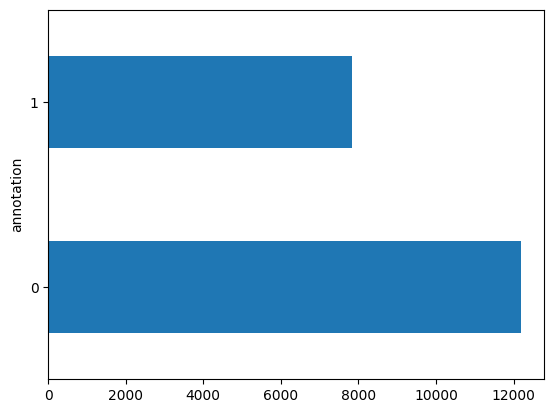

In [10]:
df['annotation'].value_counts().sort_index().plot.barh()

In [11]:
print("Positive: ", df.annotation.value_counts()[0]/len(df.annotation)*100,"%")
print("Negative: ", df.annotation.value_counts()[1]/len(df.annotation)*100,"%")

Positive:  60.89195540222989 %
Negative:  39.10804459777012 %


In [12]:
nltk.download('stopwords')
stop = stopwords.words('english')

regex = re.compile('[%s]' % re.escape(string.punctuation))

def test_re(s):
    return regex.sub('', s)

df ['content_without_stopwords'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df ['content_without_puncs'] = df['content_without_stopwords'].apply(lambda x: regex.sub('',x))
del df['content_without_stopwords']
del df['content']
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MOKSHITA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,annotation,metadata,content_without_puncs
0,1,"{'first_done_at': 1527503426000, 'last_updated...",Get fucking real dude
1,1,"{'first_done_at': 1527503426000, 'last_updated...",She dirty come crook Rengel Dems fucking corru...
2,1,"{'first_done_at': 1527503426000, 'last_updated...",fuck up I could day too Lets hour Ping later s...
3,1,"{'first_done_at': 1527503426000, 'last_updated...",Dude dont finish enclosing fucking showers I h...
4,1,"{'first_done_at': 1527503426000, 'last_updated...",WTF talking Men No men thats menage thats gay
...,...,...,...
19996,0,"{'first_done_at': 1527503519000, 'last_updated...",I dont But complaining going do
19997,0,"{'first_done_at': 1527503519000, 'last_updated...",Bahah yeah im totally gonna get pissed talking...
19998,0,"{'first_done_at': 1527503519000, 'last_updated...",hahahahaha im evil mwahahahahahahahahaha
19999,0,"{'first_done_at': 1527503519000, 'last_updated...",Whats something unique Ohio


In [13]:
nltk.download('punkt_tab')
nltk.download('punkt')
porter_stemmer = PorterStemmer()
tok_list = []
size = df.shape[0]

for i in range(size):
  word_data = df['content_without_puncs'][i]
  nltk_tokens = nltk.word_tokenize(word_data)
  final = ''
  for w in nltk_tokens:
    final = final + ' ' + porter_stemmer.stem(w)
  tok_list.append(final)

df['content_tokenize'] = tok_list
del df['content_without_puncs']
df

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\MOKSHITA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MOKSHITA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,annotation,metadata,content_tokenize
0,1,"{'first_done_at': 1527503426000, 'last_updated...",get fuck real dude
1,1,"{'first_done_at': 1527503426000, 'last_updated...",she dirti come crook rengel dem fuck corrupt ...
2,1,"{'first_done_at': 1527503426000, 'last_updated...",fuck up i could day too let hour ping later s...
3,1,"{'first_done_at': 1527503426000, 'last_updated...",dude dont finish enclos fuck shower i hate ha...
4,1,"{'first_done_at': 1527503426000, 'last_updated...",wtf talk men no men that menag that gay
...,...,...,...
19996,0,"{'first_done_at': 1527503519000, 'last_updated...",i dont but complain go do
19997,0,"{'first_done_at': 1527503519000, 'last_updated...",bahah yeah im total gon na get piss talk you ...
19998,0,"{'first_done_at': 1527503519000, 'last_updated...",hahahahaha im evil mwahahahahahahahahaha
19999,0,"{'first_done_at': 1527503519000, 'last_updated...",what someth uniqu ohio


In [14]:
noNums = []
for i in range(len(df)):
  noNums.append(''.join([i for i in df['content_tokenize'][i] if not i.isdigit()]))

df['content'] = noNums
df

,annotation,metadata,content_tokenize,content
0,1,"{'first_done_at': 1527503426000, 'last_updated...",get fuck real dude,get fuck real dude
1,1,"{'first_done_at': 1527503426000, 'last_updated...",she dirti come crook rengel dem fuck corrupt ...,she dirti come crook rengel dem fuck corrupt ...
2,1,"{'first_done_at': 1527503426000, 'last_updated...",fuck up i could day too let hour ping later s...,fuck up i could day too let hour ping later s...
3,1,"{'first_done_at': 1527503426000, 'last_updated...",dude dont finish enclos fuck shower i hate ha...,dude dont finish enclos fuck shower i hate ha...
4,1,"{'first_done_at': 1527503426000, 'last_updated...",wtf talk men no men that menag that gay,wtf talk men no men that menag that gay
...,...,...,...,...
19996,0,"{'first_done_at': 1527503519000, 'last_updated...",i dont but complain go do,i dont but complain go do
19997,0,"{'first_done_at': 1527503519000, 'last_updated...",bahah yeah im total gon na get piss talk you ...,bahah yeah im total gon na get piss talk you ...
19998,0,"{'first_done_at': 1527503519000, 'last_updated...",hahahahaha im evil mwahahahahahahahahaha,hahahahaha im evil mwahahahahahahahahaha
19999,0,"{'first_done_at': 1527503519000, 'last_updated...",what someth uniqu ohio,what someth uniqu ohio


In [15]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.content.tolist())

In [16]:
print(tfIdf.shape)

(20001, 14783)


In [17]:
df2 = pd.DataFrame(tfIdf[2].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"]) #for second entry only(just to check if working)
df2 = df2.sort_values('TF-IDF', ascending=False)
print (df2.head(10))

         TF-IDF
sched  0.413066
ping   0.382982
later  0.306131
write  0.287619
book   0.285848
hour   0.281449
here   0.262648
let    0.241995
up     0.237401
could  0.223151


In [18]:
dfx = pd.DataFrame(tfIdf.toarray(), columns = tfIdfVectorizer.get_feature_names_out())

In [19]:
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names_out(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    i=0
    for item in sorted_scores:
        print ("{0:50} Score: {1}".format(item[0], item[1]))
        i = i+1
        if (i > 25):
          break

In [20]:
display_scores(tfIdfVectorizer, tfIdf)

hate                                               Score: 533.8157298036014
fuck                                               Score: 503.76150769255435
damn                                               Score: 482.3875012051478
suck                                               Score: 407.37790877127185
ass                                                Score: 337.54089621427744
that                                               Score: 311.6250930420745
lol                                                Score: 298.0085779872157
im                                                 Score: 296.0216055277791
like                                               Score: 287.8183474868775
you                                                Score: 284.7850587424088
it                                                 Score: 254.75722294501585
get                                                Score: 253.19747902607998
what                                               Score: 221.43673623523864
know  

In [21]:
X=tfIdf.toarray()
y = np.array(df.annotation.tolist())
#Spltting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18000, 14783)
(18000,)
(2001, 14783)
(2001,)


In [22]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [10964  7036]]


In [23]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [1215  786]]


In [24]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [25]:
print(X_over.shape)
print(y_over.shape)

(21928, 14783)
(21928,)


In [26]:
unique_elements, counts_elements = np.unique(y_over, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [10964 10964]]


In [27]:
def getStatsFromModel(model):
  print(classification_report(y_test, y_pred))
  disp = plot_precision_recall_curve(model, X_test, y_test)
  disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}')
  
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

In [ ]:
rfc = RandomForestClassifier(verbose=True) 
rfcmodel = rfc.fit(X_over, y_over)
y_pred = rfc.predict(X_test)
print ("Score:", rfcmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(rfc)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  6.1min
